### Imports

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Data
spamposts = pd.read_csv('../Data/spam_post_data.csv')
moviereviews = pd.read_csv('../Data/moviereview_post_data.csv')

### Cleaning

#### Spam df cleaning

In [3]:
spamposts.head()

,created_utc,title,self_text,subreddit
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams
3,1.697587e+09,I am waiting on a package…,"So, I got this text message and I’m trying to ...",Scams
4,1.697586e+09,Snapchat Minor Solicitation Scam?,Added a girl on Snapchat from Omegle. Look at ...,Scams


In [4]:
spamposts.shape

(8453, 4)

In [5]:
spamposts.isna().sum()

created_utc       0
title             0
self_text      3528
subreddit         0
dtype: int64

In [6]:
spamposts.dropna(inplace=True)

In [7]:
spamposts.duplicated().sum()

2128

In [8]:
spamposts.drop_duplicates(inplace=True)
spamposts.shape

(2797, 4)

In [9]:
spamposts['subreddit'].value_counts()

Scams         1084
phishing      1030
Malware        611
scam_radar      72
Name: subreddit, dtype: int64

#### Movie Review df cleaning

In [10]:
moviereviews.head()

,created_utc,title,self_text,subreddit
0,1.683472e+09,"Announcement: Changes, Looking for Mods, Join ...",# This Reddit group is going to have a revamp ...,moviereviews
1,1.697134e+09,Discover the Latest Releases: New Movies from ...,&#x200B;\n\n|\#|Name|Year Released|Genres|\n|:...,moviereviews
2,1.697563e+09,Titanic Movie Review - Danger And Hidden Story...,NaN,moviereviews
3,1.697388e+09,Little Miss Rawther Malayalam Movie Review,\#LittleMissRawther #Malayalam #MovieReview\n\...,moviereviews
4,1.697208e+09,Ballerina (2023) review – A slick South Korean...,https://thegenrejunkie.com/ballerina-2023/,moviereviews


In [11]:
moviereviews.shape

(2561, 4)

In [12]:
moviereviews.isnull().sum()

created_utc       0
title             0
self_text      1142
subreddit         0
dtype: int64

In [13]:
moviereviews.dropna(inplace=True)

In [14]:
# Chatgpt wrote this 
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)
moviereviews['self_text'] = moviereviews['self_text'].apply(remove_urls)

In [15]:
moviereviews = moviereviews[moviereviews['self_text'].str.len() > 0]


In [16]:
moviereviews.duplicated().sum()

473

In [17]:
moviereviews.drop_duplicates(inplace=True)
moviereviews.shape

(925, 4)

### EDA

#### Spam Posts 

In [18]:
spamposts.head()

,created_utc,title,self_text,subreddit
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams
3,1.697587e+09,I am waiting on a package…,"So, I got this text message and I’m trying to ...",Scams
4,1.697586e+09,Snapchat Minor Solicitation Scam?,Added a girl on Snapchat from Omegle. Look at ...,Scams


In [19]:
spamposts['self_text_len'] = spamposts['self_text'].apply(len)
spamposts['self_text_count'] = spamposts['self_text'].apply(lambda x: len(x.split()))
spamposts.head(3)

,created_utc,title,self_text,subreddit,self_text_len,self_text_count
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams,939,183
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams,481,92
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams,1377,254


In [20]:
text = spamposts[['subreddit', 'self_text_len', 'self_text_count']]
text_mean = []

for t in text.columns:
    t_mean = text.groupby(t).agg({
        'self_text_len': 'mean',
        'self_text_count' : 'mean'
    })
    text_mean.append(t_mean)

text_mean = pd.concat(text_mean, keys=text.columns[::3])
text_mean

self_text_len  self_text_count
          subreddit                                 
subreddit Malware        703.494272        98.638298
          Scams          902.959410       164.819188
          phishing       729.627184       121.966990
          scam_radar     499.888889        81.541667

In [21]:
scams = spamposts[spamposts['subreddit'] == 'Scams'][['self_text_count']]
malware = spamposts[spamposts['subreddit'] == 'Malware'][['self_text_count']]
phishing = spamposts[spamposts['subreddit'] == 'phishing'][['self_text_count']]
scamradar = spamposts[spamposts['subreddit'] == 'scam_radar'][['self_text_count']]

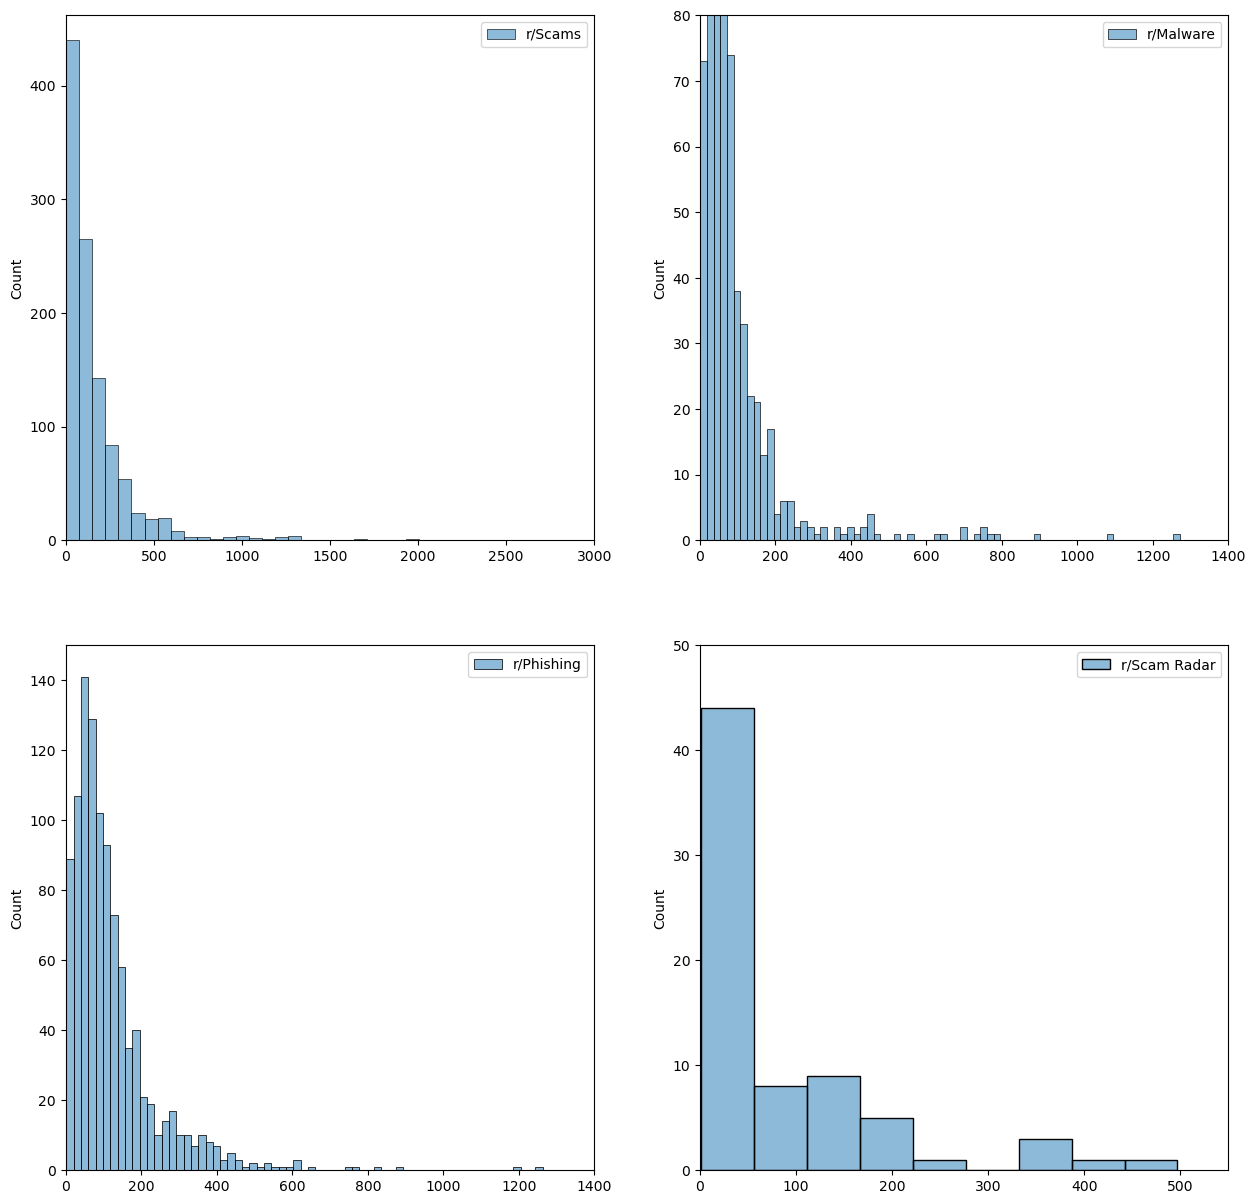

In [22]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

sns.histplot(data=scams, ax=ax[0, 0], bins=80, label='r/Scams', color ='red')
ax[0, 0].set_xlim(0, 3000)
ax[0, 0].legend()
sns.histplot(data=malware, ax=ax[0, 1], label='r/Malware', color = 'purple')
ax[0, 1].set_ylim(0, 80)
ax[0, 1].set_xlim(0, 1400)
ax[0, 1].legend()
sns.histplot(data=phishing, ax=ax[1, 0], label='r/Phishing', color='pink')
ax[1, 0].set_ylim(0, 150)
ax[1, 0].set_xlim(0, 1400)
ax[1, 0].legend()
sns.histplot(data=scamradar, ax=ax[1, 1], label='r/Scam Radar', color='turquoise')
ax[1, 1].set_ylim(0, 50)
ax[1, 1].set_xlim(0, 550)
ax[1, 1].legend()

In [23]:
cvec = CountVectorizer(stop_words='english')
cvec_text = pd.DataFrame((cvec.fit_transform(spamposts['self_text'])).todense(), 
                         columns= cvec.get_feature_names_out())
cvec_text.head()

,00,000,0000,000000,00000000,00000001,00000009,0000011,00001,000018ea0000,...,𝒘𝒉𝒂𝒕,𝒘𝒉𝒆𝒓𝒆,𝒘𝒉𝒊𝒄𝒉,𝒘𝒊𝒕𝒉𝒅𝒓𝒂𝒘,𝒘𝒐𝒖𝒍𝒅,𝟏𝟔𝟓𝒌,𝟐𝟗𝟖,𝟓𝟑𝟔𝟐,𝟔𝟏𝟖𝟔𝟎𝟎𝟕𝟑𝟒𝟎𝟒,𝟕𝟐𝟓
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


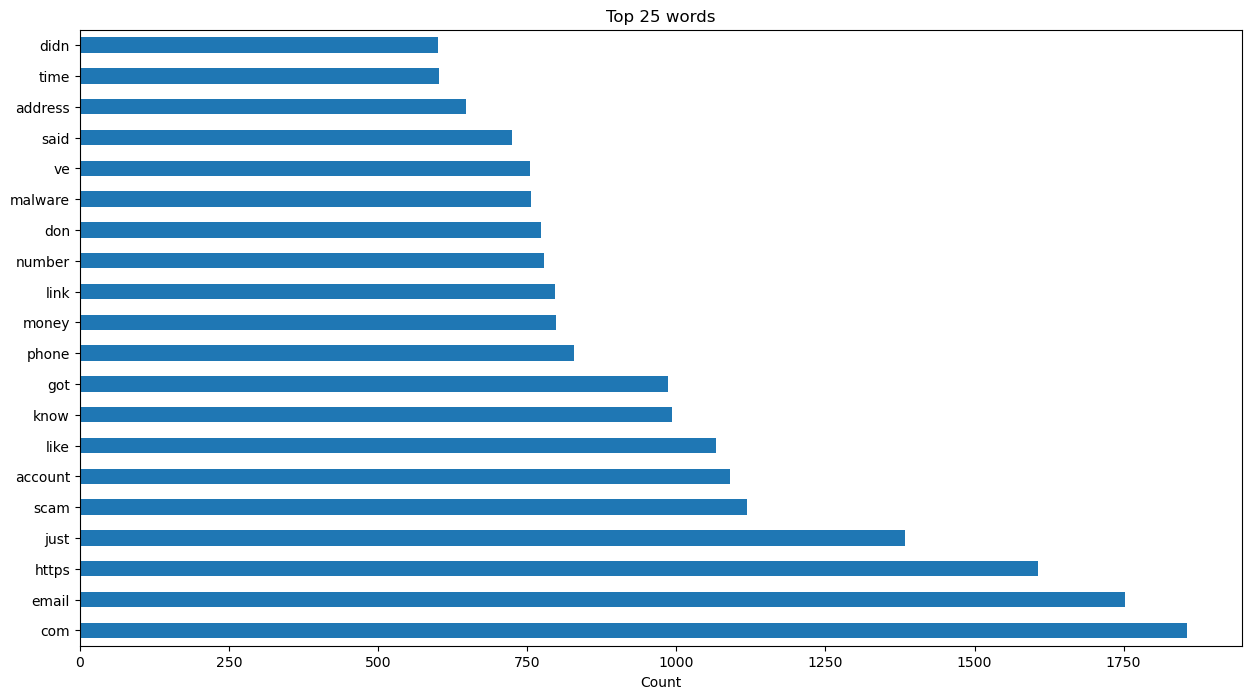

In [24]:
plt.figure(figsize=(15,8))
cvec_text.sum().sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Top 25 words')
plt.xlabel('Count')
plt.savefig('../Graphs/Scam_top25_words.png')

<Axes: >

/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 120789 (\N{MATHEMATICAL BOLD DIGIT SEVEN}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 120784 (\N{MATHEMATICAL BOLD DIGIT TWO}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 120787 (\N{MATHEMATICAL BOLD DIGIT FIVE}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120789 (\N{MATHEMATICAL BOLD DIGIT SEVEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 120784 (\N{MATHEMATICAL BOLD DIGIT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.

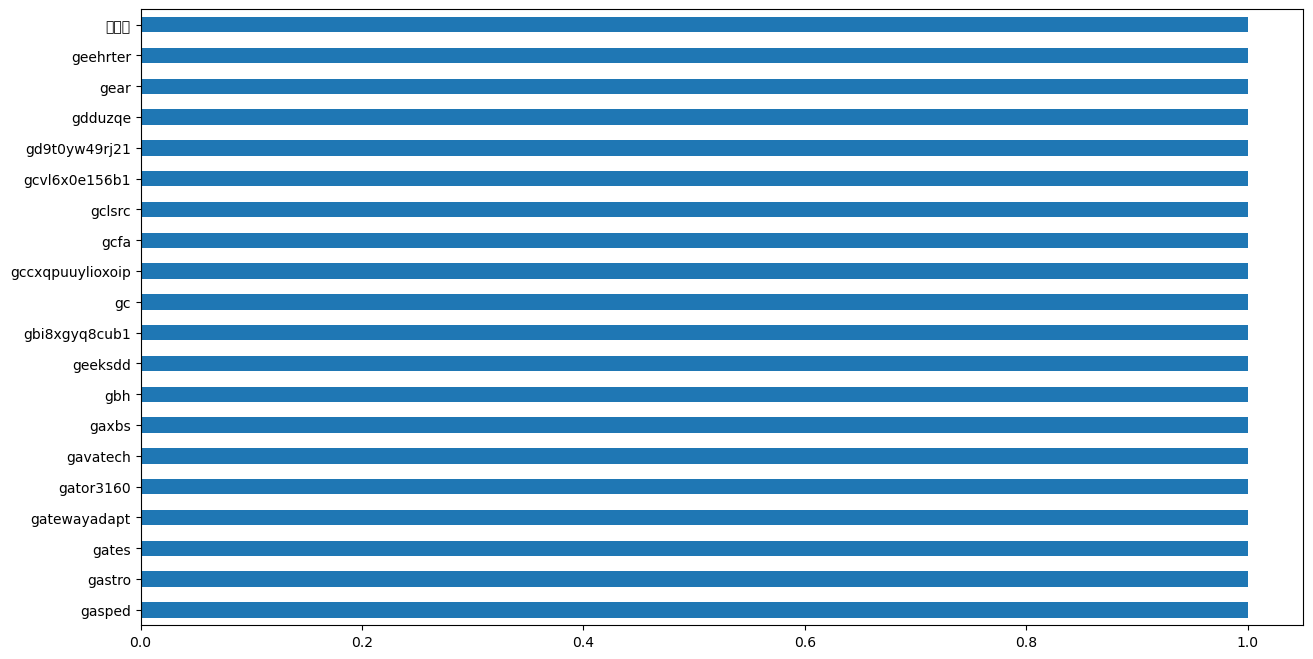

In [25]:
plt.figure(figsize=(15,8))
cvec_text.sum().sort_values(ascending=False).tail(20).plot(kind='barh')

In [26]:
punctuation = ['.',',','?','!','"', "'", ':', ';']

spamposts['punc_count'] = [sum (1 for punc in status if punc in punctuation) 
                           for status in spamposts['self_text']]

scams_punc = spamposts[spamposts['subreddit'] == 'Scams'][['punc_count']]
malware_punc = spamposts[spamposts['subreddit'] == 'Malware'][['punc_count']]
phishing_punc = spamposts[spamposts['subreddit'] == 'phishing'][['punc_count']]
scamradar_punc = spamposts[spamposts['subreddit'] == 'scam_radar'][['punc_count']]

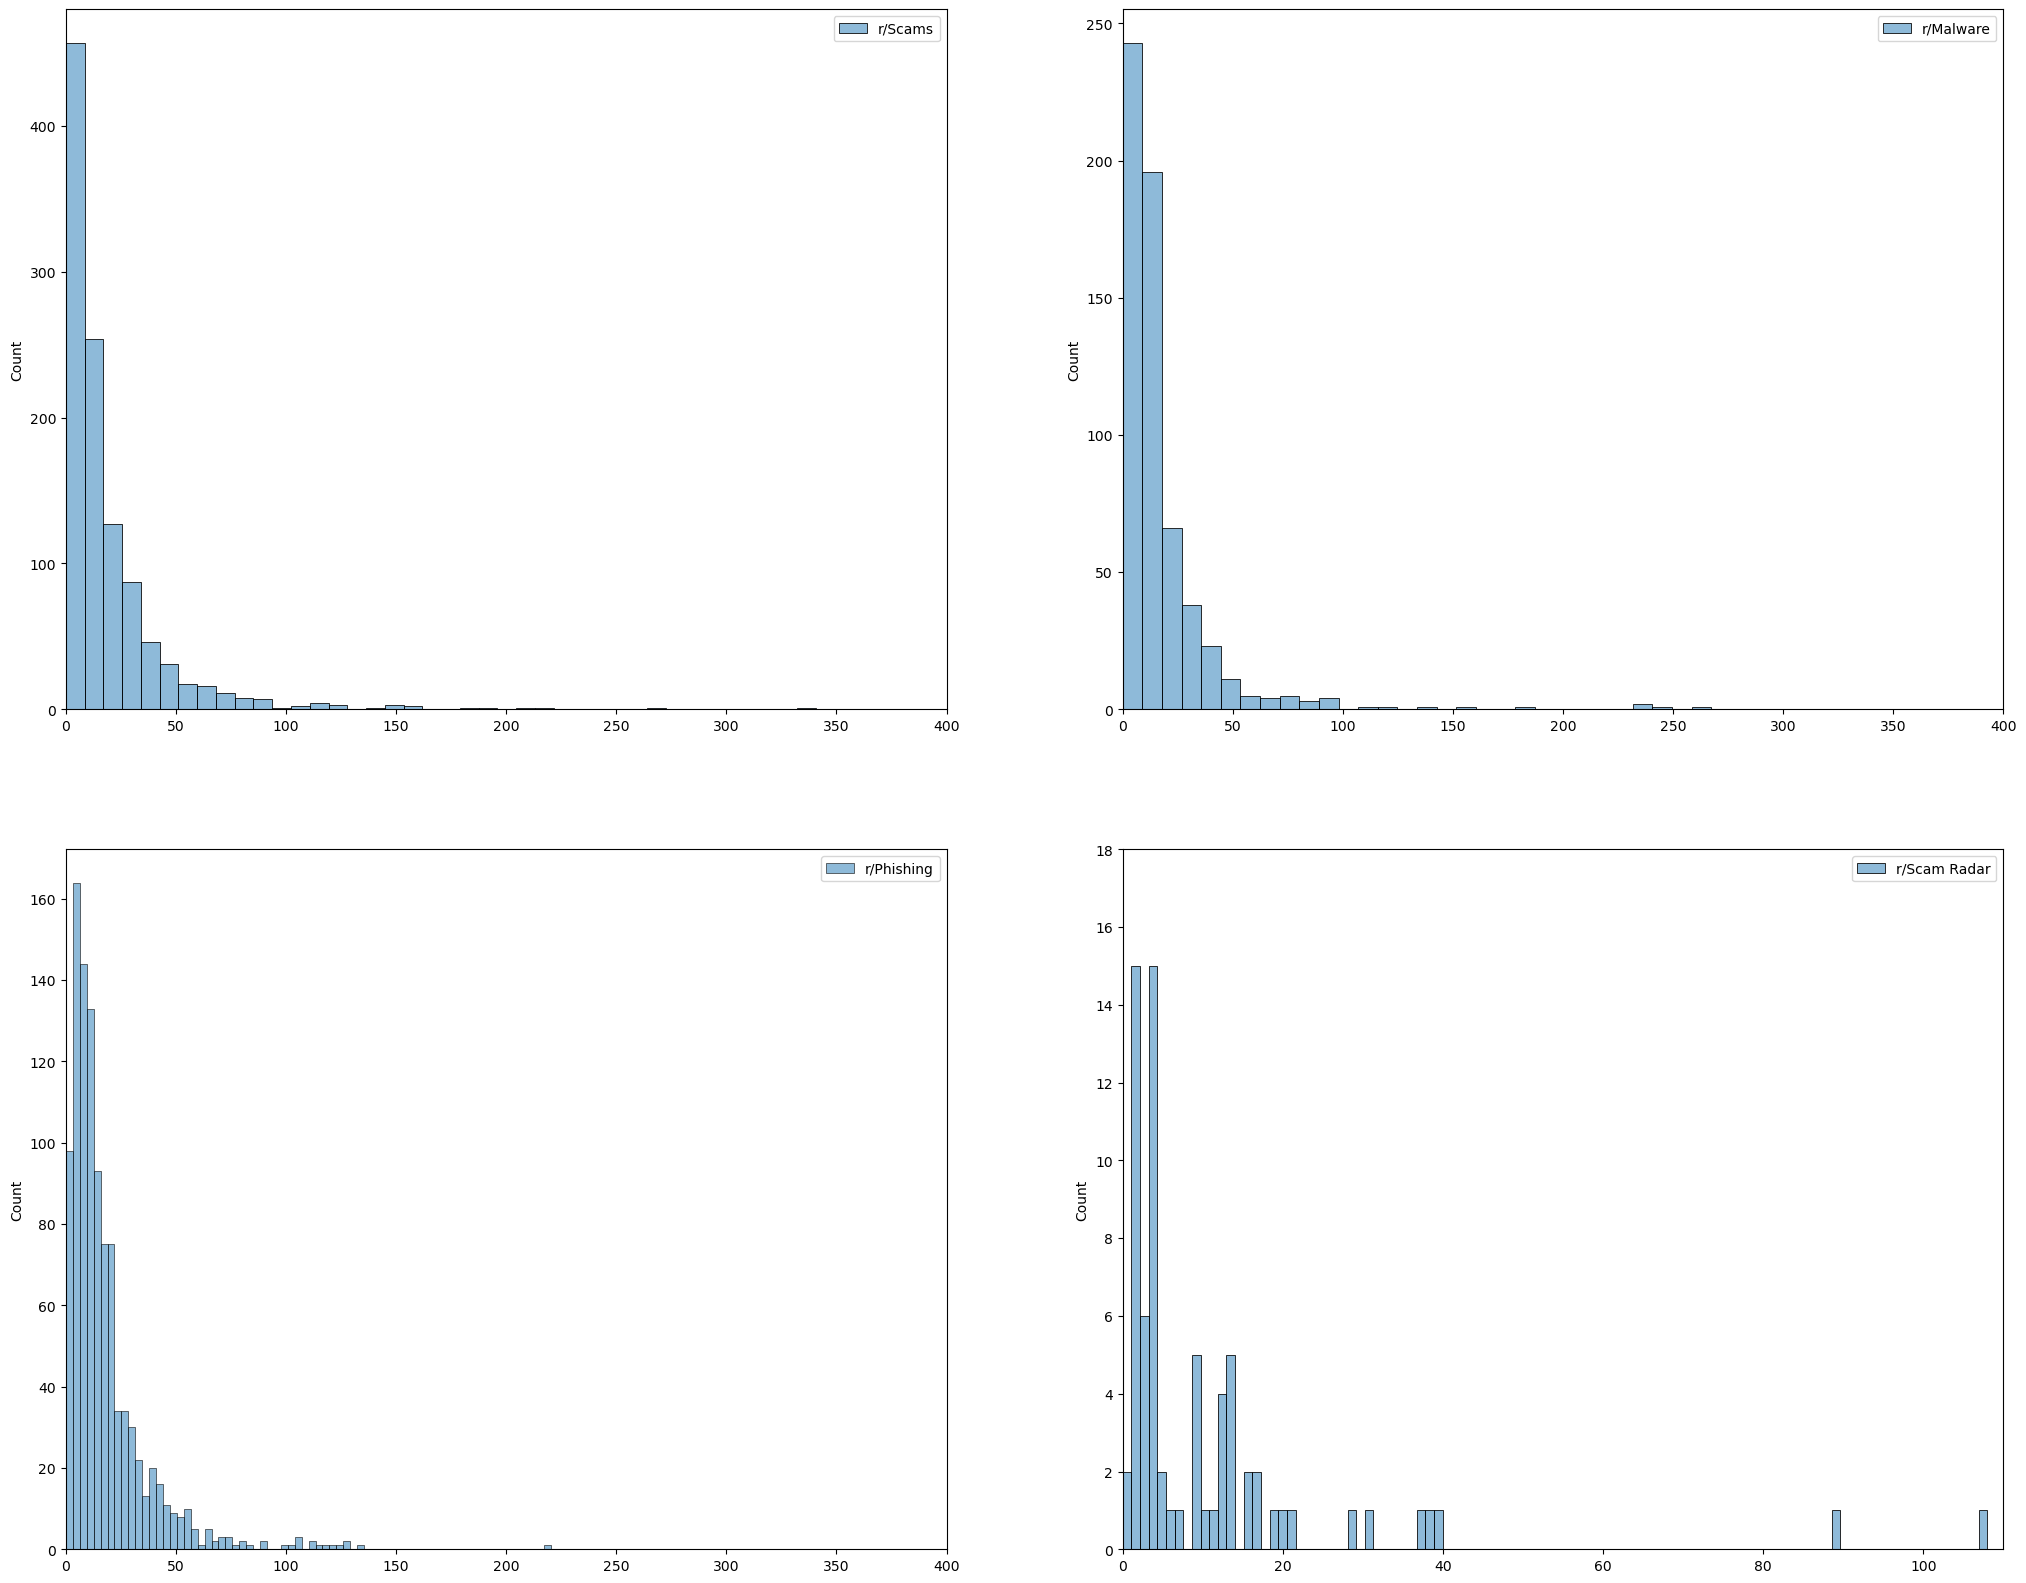

In [27]:
fig, ax = plt.subplots(2,2, figsize=(25,20))

sns.histplot(data=scams_punc, ax=ax[0, 0], bins=100, label='r/Scams', color ='red')
ax[0, 0].set_ylim(0, 480)
ax[0, 0].set_xlim(0, 400)
ax[0, 0].legend()
sns.histplot(data=malware_punc, ax=ax[0, 1],bins=100, label='r/Malware', color = 'purple')
ax[0, 1].set_xlim(0, 400)
ax[0, 1].legend()
sns.histplot(data=phishing_punc, ax=ax[1, 0], label='r/Phishing', color='pink')
ax[1, 0].set_xlim(0, 400)
ax[1, 0].legend()
sns.histplot(data=scamradar_punc, ax=ax[1, 1], bins=100, label='r/Scam Radar', color='turquoise')
ax[1, 1].set_ylim(0, 18)
ax[1, 1].set_xlim(0, 110)
ax[1, 1].legend()
plt.savefig('../Graphs/scam_punctuation_count.png', dpi=192)

In [28]:
scams_punc.mean()

punc_count    20.073801
dtype: float64

In [29]:
means = [scams_punc.mean(), malware_punc.mean(), phishing_punc.mean(), scamradar_punc.mean()]
means

[punc_count    20.073801
 dtype: float64,
 punc_count    21.949264
 dtype: float64,
 punc_count    18.447573
 dtype: float64,
 punc_count    11.236111
 dtype: float64]

#### Movie Reviews

In [30]:
moviereviews.head()

,created_utc,title,self_text,subreddit
0,1.683472e+09,"Announcement: Changes, Looking for Mods, Join ...",# This Reddit group is going to have a revamp ...,moviereviews
1,1.697134e+09,Discover the Latest Releases: New Movies from ...,&#x200B;\n\n|\#|Name|Year Released|Genres|\n|:...,moviereviews
3,1.697388e+09,Little Miss Rawther Malayalam Movie Review,\#LittleMissRawther #Malayalam #MovieReview\n\...,moviereviews
6,1.697134e+09,The John Wick series is a masterpiece.,These films get a lot of praise as action movi...,moviereviews
8,1.697090e+09,Who are your top 5 movie creators of all time?,This includes people who just make the best mo...,moviereviews


In [31]:
moviereviews['self_text_len'] = moviereviews['self_text'].apply(len)
moviereviews['self_text_count'] = moviereviews['self_text'].apply(lambda x: len(x.split()))
moviereviews.tail(3)

,created_utc,title,self_text,subreddit,self_text_len,self_text_count
1798,1.588160e+09,Extraction,Is an Excellent Action Flick!,moviereviews,29,5
1802,1.587535e+09,Body at Brighton Rock review,This post is more of a “vent” on how awful of ...,moviereviews,585,107
1804,1.587275e+09,[OC] Ranking All Eight Harry Potter Films | Yo...,\n\n[ The Harry Potter franchise is a huge fa...,moviereviews,814,152


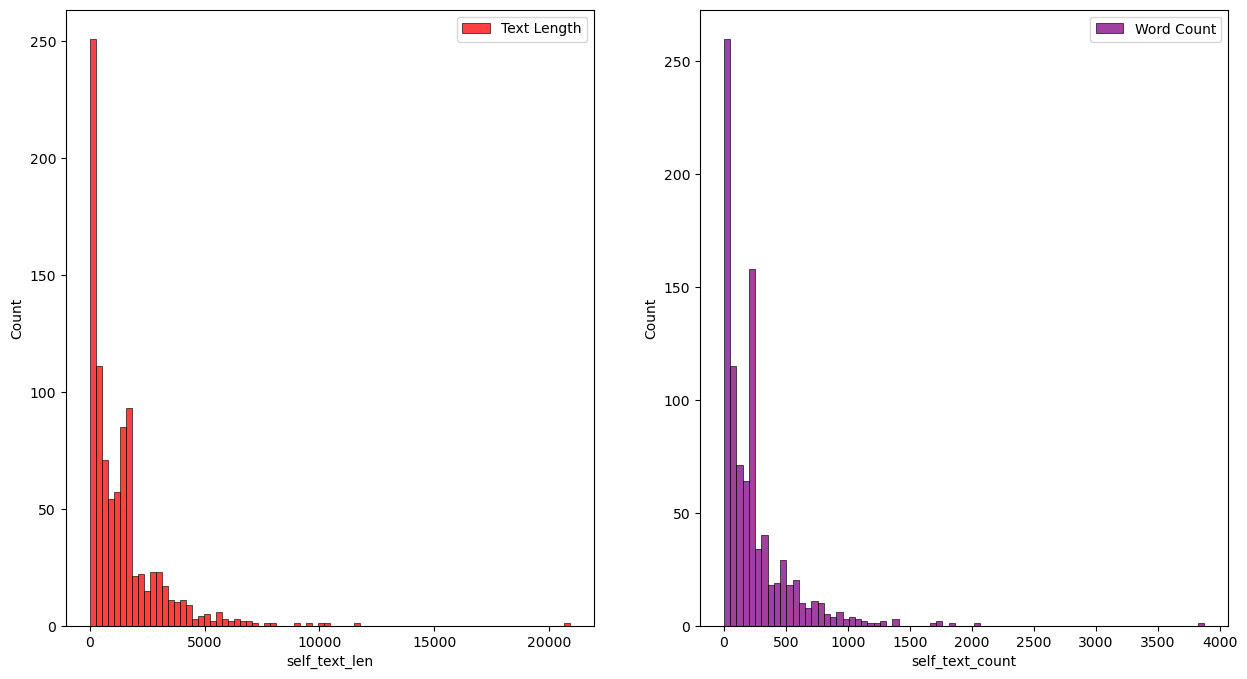

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(data=moviereviews['self_text_len'], ax=ax[0], bins=80, label='Text Length', 
             color ='red')
ax[0].legend()
sns.histplot(data=moviereviews['self_text_count'], ax=ax[1], label='Word Count', color = 'purple')
ax[1].legend()

In [33]:
cvec2 = CountVectorizer(stop_words='english')
cvec2_text = pd.DataFrame((cvec2.fit_transform(moviereviews['self_text'])).todense(), 
                         columns= cvec2.get_feature_names_out())
cvec2_text.head()

,00,000,007,01,05,10,100,1000,1000000000,1001,...,மக,மன,மல,யண,ரம,றத,லப,லம,வசனத,ஷன
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


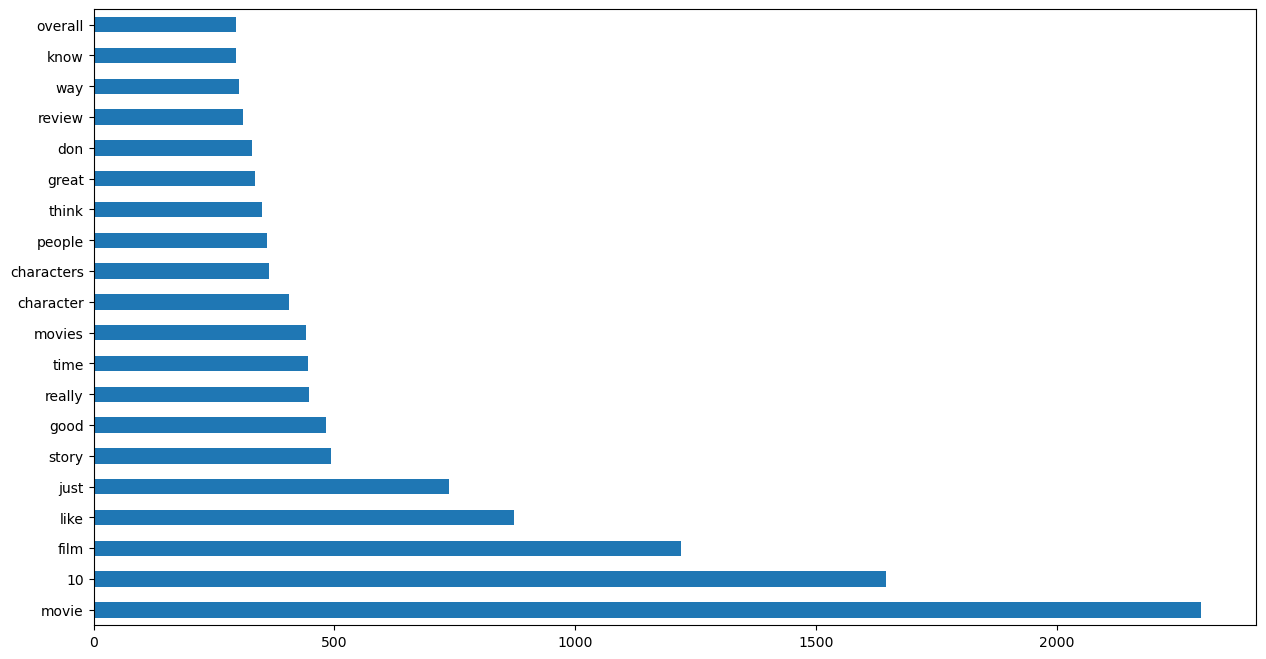

In [34]:
plt.figure(figsize=(15,8))
cvec2_text.sum().sort_values(ascending=False).head(20).plot(kind='barh')
plt.savefig('../Graphs/Movie_top25_words.png')

<Axes: >

/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2999 (\N{TAMIL LETTER SSA}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Tamil natively.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2985 (\N{TAMIL LETTER NNNA}) missing from current font.
  func(*args, **kwargs)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2999 (\N{TAMIL LETTER SSA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2985 (\N{TAMIL 

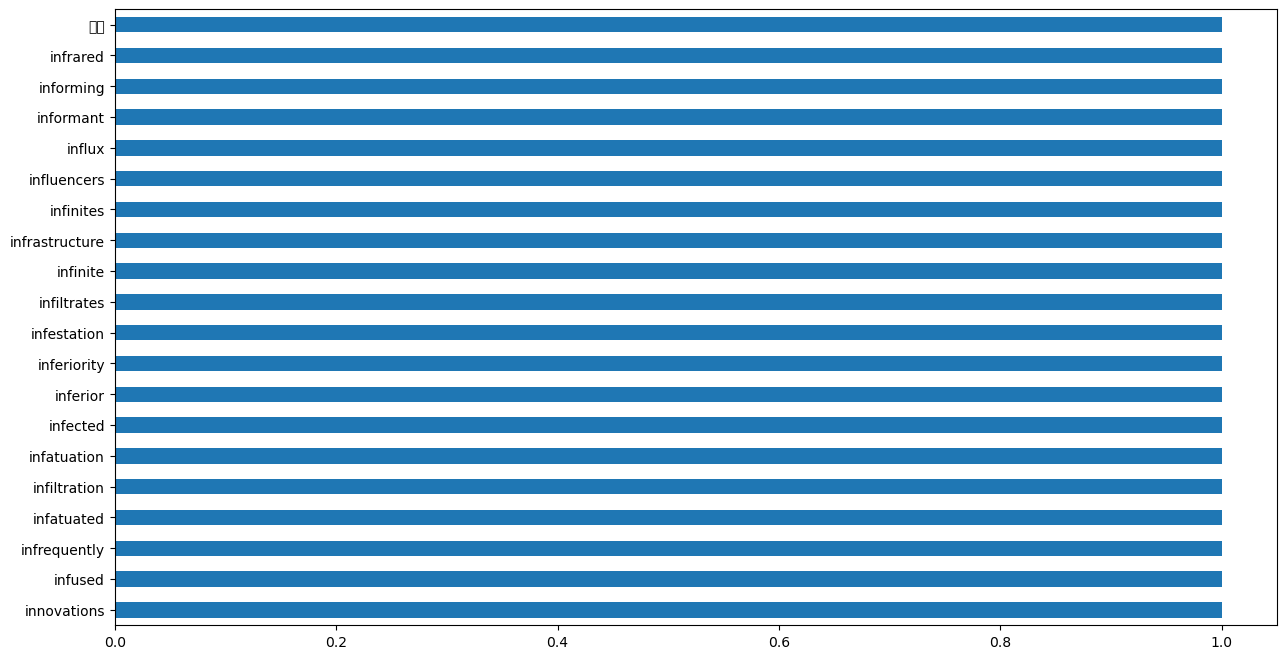

In [35]:
plt.figure(figsize=(15,8))
cvec2_text.sum().sort_values(ascending=False).tail(20).plot(kind='barh')

In [36]:
moviereviews['punc_count'] = [sum (1 for punc in status if punc in punctuation) 
                           for status in moviereviews['self_text']]

review_punc = moviereviews[moviereviews['subreddit'] == 'moviereviews'][['punc_count']]
suggestions_punc = moviereviews[moviereviews['subreddit'] == 'MovieSuggestions'][['punc_count']]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


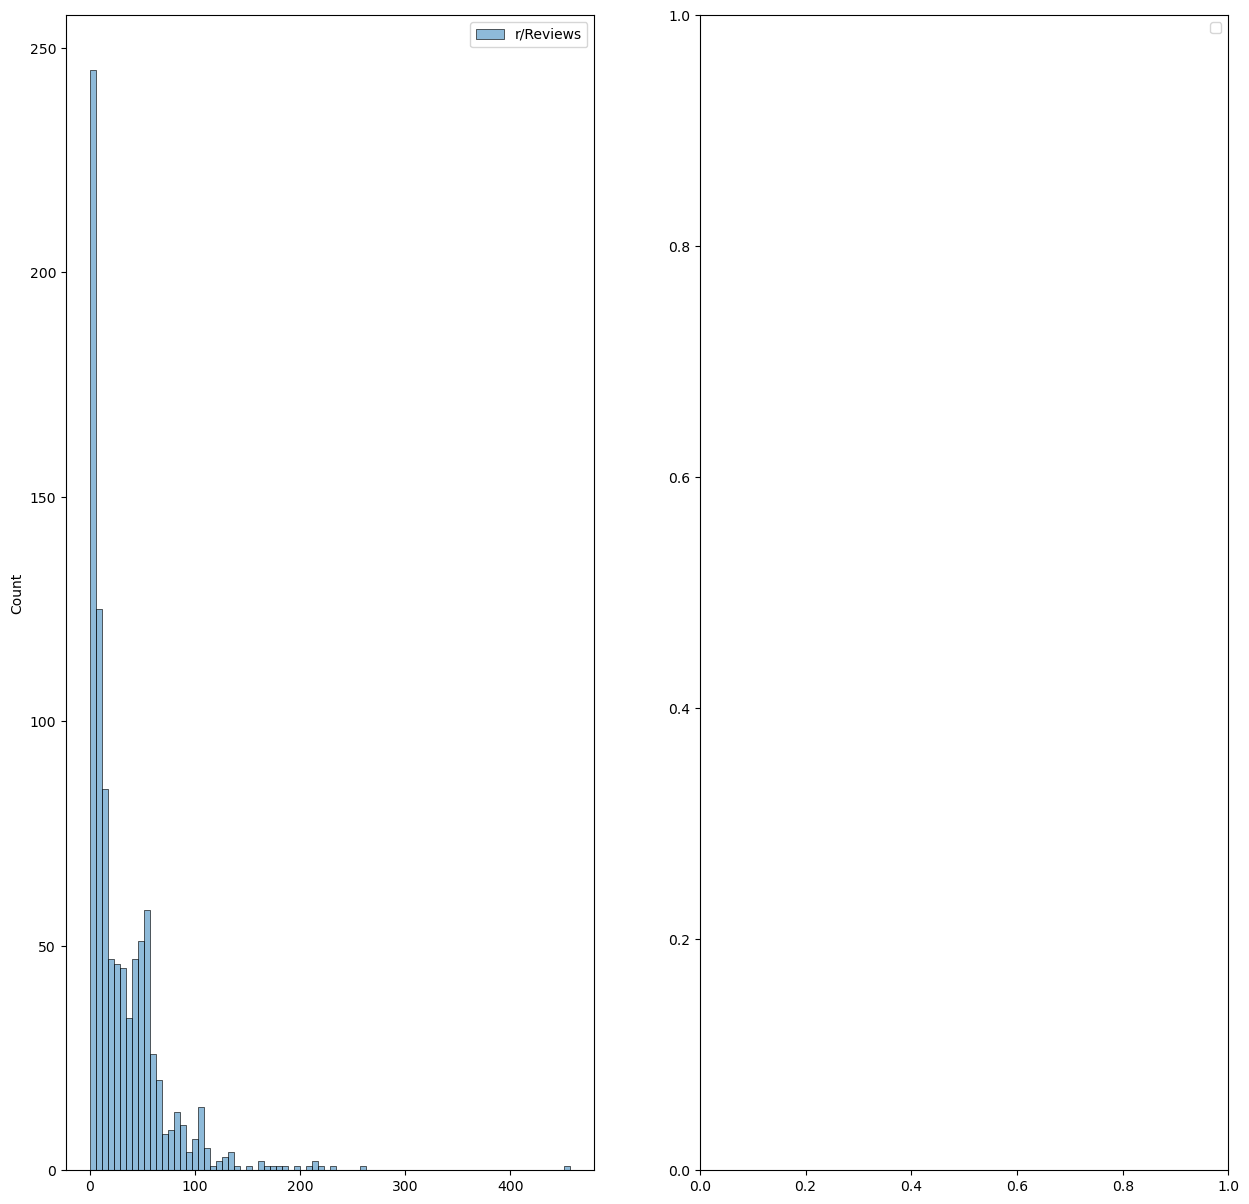

In [37]:
fig, ax = plt.subplots(1,2, figsize=(15,15))

sns.histplot(data=review_punc, ax=ax[0], bins=80, label='r/Reviews', color ='red')
#x[0].set_xlim(0, 3000)
ax[0].legend()
sns.histplot(data=suggestions_punc, ax=ax[1], bins=80, label='r/Suggestions', color = 'purple')
#ax[1].set_ylim(0, 80)
#ax[1].set_xlim(0, 1400)
ax[1].legend()
plt.savefig('../Graphs/Movie_punctuation_count.png')

### Merging DataFrames

In [38]:
df = pd.concat([spamposts, moviereviews], axis=0)
df['subreddit'].value_counts()

Scams           1084
phishing        1030
moviereviews     925
Malware          611
scam_radar        72
Name: subreddit, dtype: int64

In [39]:
df.tail()

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count
1796,1.588269e+09,Shazam! (2019) Review,\n\nI am not a huge fan of live action super...,moviereviews,4228,778,68
1797,1.588195e+09,Calling All Movie Reviewers,"Hey guys, here’s a random request for you all....",moviereviews,483,95,15
1798,1.588160e+09,Extraction,Is an Excellent Action Flick!,moviereviews,29,5,1
1802,1.587535e+09,Body at Brighton Rock review,This post is more of a “vent” on how awful of ...,moviereviews,585,107,10
1804,1.587275e+09,[OC] Ranking All Eight Harry Potter Films | Yo...,\n\n[ The Harry Potter franchise is a huge fa...,moviereviews,814,152,28


In [40]:
df['scam_notscam'] = [0 if item in ('moviereviews', 'MovieSuggestions') else 1 
                    for item in df['subreddit']]
df['scam_notscam'].value_counts()

1    2797
0     925
Name: scam_notscam, dtype: int64

In [41]:
df.to_csv('../Data/merged_data.csv', index=False)

### Categorising Scam data for 2nd model

In [42]:
spamposts.head()

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Scams,939,183,32
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Scams,481,92,4
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Scams,1377,254,27
3,1.697587e+09,I am waiting on a package…,"So, I got this text message and I’m trying to ...",Scams,192,41,5
4,1.697586e+09,Snapchat Minor Solicitation Scam?,Added a girl on Snapchat from Omegle. Look at ...,Scams,866,161,24


In [43]:
spamposts.shape

(2797, 7)

In [44]:
scamposts = spamposts[spamposts['subreddit'].isin(['Scams', 'scam_radar'])]
phishing = scamposts.sample(frac=0.5)
phishing['subreddit'] = 'Phishing'
malwareposts = scamposts.drop(phishing.index)
malwareposts['subreddit'] = 'Malware'
malwareposts

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count
0,1.697589e+09,Is my friend about to be scammed?,Friend of mine from back in Uni (before we mov...,Malware,939,183,32
1,1.697586e+09,Just Delt with an AirBnB Scam anyone can do an...,Apparently you can instant book seasonal renta...,Malware,481,92,4
2,1.697586e+09,Spam caller knew my name and 'address' but it ...,First off I am new to posting on Reddit so ple...,Malware,1377,254,27
5,1.697561e+09,Phone was stolen around a month ago and I’m no...,For context I got my phone stolen in early Sep...,Malware,280,57,4
7,1.697567e+09,Scammer regret,I had an unusual scam call just now. The lead ...,Malware,579,109,13
...,...,...,...,...,...,...,...
7047,1.696976e+09,Beware of Crypto Scams: My Personal Experience,"Hey Reddit Community,\n\nI hope you're all doi...",Malware,2156,386,66
7048,1.696983e+09,Books on Scams,Can anyone kindly recommend some good books on...,Malware,181,30,5
7050,1.696967e+09,Landlord wants me to fill out transunion backg...,Looked up a rental online and the price of ren...,Malware,914,129,14
7052,1.696966e+09,PSA to Apple Users,For any Apple users out there who get scam tex...,Malware,195,38,3


In [45]:
phis_mal_posts = spamposts[spamposts['subreddit'].isin(['Malware', 'phishing'])]
df_phis_mal = pd.concat([phis_mal_posts, malwareposts, phishing], axis=0)
df_phis_mal['phis_orMal'] = [0 if item in ('Malware') else 1 
                    for item in df_phis_mal['subreddit']]
df_phis_mal['phis_orMal'].value_counts()
df_phis_mal.head()

,created_utc,title,self_text,subreddit,self_text_len,self_text_count,punc_count,phis_orMal
25,1.697552e+09,Malware on New York Times top sponsored link u...,"Today I Googled ""NYT"" and clicked the top spon...",Malware,657,111,19,0
27,1.697553e+09,Why would a Url redirect to multiple sites,I saw gmai.com on my security audit this morni...,Malware,325,61,5,0
28,1.697547e+09,Accessibility malware on android,If a user downloads a malicious app from outsi...,Malware,470,73,5,0
30,1.697298e+09,Benefits of Dynamic analysis vs Any.run(intera...,"Hello,\n\nI was wondering since [any.run](http...",Malware,356,50,10,0
34,1.697571e+09,Opened a spam pdf in hurry,Recieved an email on my phone saying norton su...,phishing,380,69,8,1


In [46]:
df_phis_mal.to_csv('../Data/Phishing_or_Malware_data.csv', index=False)